# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных таблицы**

   - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)ек
   - balcony — число балконов
   - ceiling_height — высота потолков (м)
   - cityCenters_nearest — расстояние до центра города (м)
   - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
   - first_day_exposition — дата публикации
   - floor — этаж
   - floors_total — всего этажей в доме
   - is_apartment — апартаменты (булев тип)
   - kitchen_area — площадь кухни в квадратных метрах (м²)
   - last_price — цена на момент снятия с публикации
   - living_area — жилая площадь в квадратных метрах (м²)
   - locality_name — название населённого пункта
   - open_plan — свободная планировка (булев тип)
   - parks_around3000 — число парков в радиусе 3 км
   - parks_nearest — расстояние до ближайшего парка (м)
   - ponds_around3000 — число водоёмов в радиусе 3 км
   - ponds_nearest — расстояние до ближайшего водоёма (м)
   - rooms — число комнат
   - studio — квартира-студия (булев тип)
   - total_area — общая площадь квартиры в квадратных метрах (м²)
   - total_images — число фотографий квартиры в объявлении

**В ходе работы планируется:**
- Изучить общую информацию о полученном датафрейме
- Выполнить предобработку данных: по возможности заполнить пропуски, выяснив их причину; обработать дубликаты (если они есть); найти и устранить выбивающиеся значения; устранить аномальные значения, определив причины их возникновения; изучить тип данных столбцов и выполнить преобразования типов данных, где это необходимо для дальнейшего анализа.
- Добавить в таблицу новые столбцы (цена одного квадратного метра; день недели, месяц и год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах)
- В ходе проведения исследовательского анализа изучить параметры объектов; изучить скорость продажи квартир; изучить, какие факторы больше всего влияют на полную стоимость объекта; посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра; выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра.


### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт библиотеки pandas и matplotlib
import pandas as pd
import matplotlib as plt

In [2]:
# снятие ограничений на количество отображаемых столбцов и количество символов в записи
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# чтение файла с данными, сохранение в data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# вывод 10 первых строк таблицы data
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение информации о пропусках и типах данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца, 23699 строк. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

In [5]:
# получение общей информации о таблице data 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Смущает информация о 100-метровых потолках и 19-комнатных квартирах. Квартира 900 м.кв. - впечатлает!

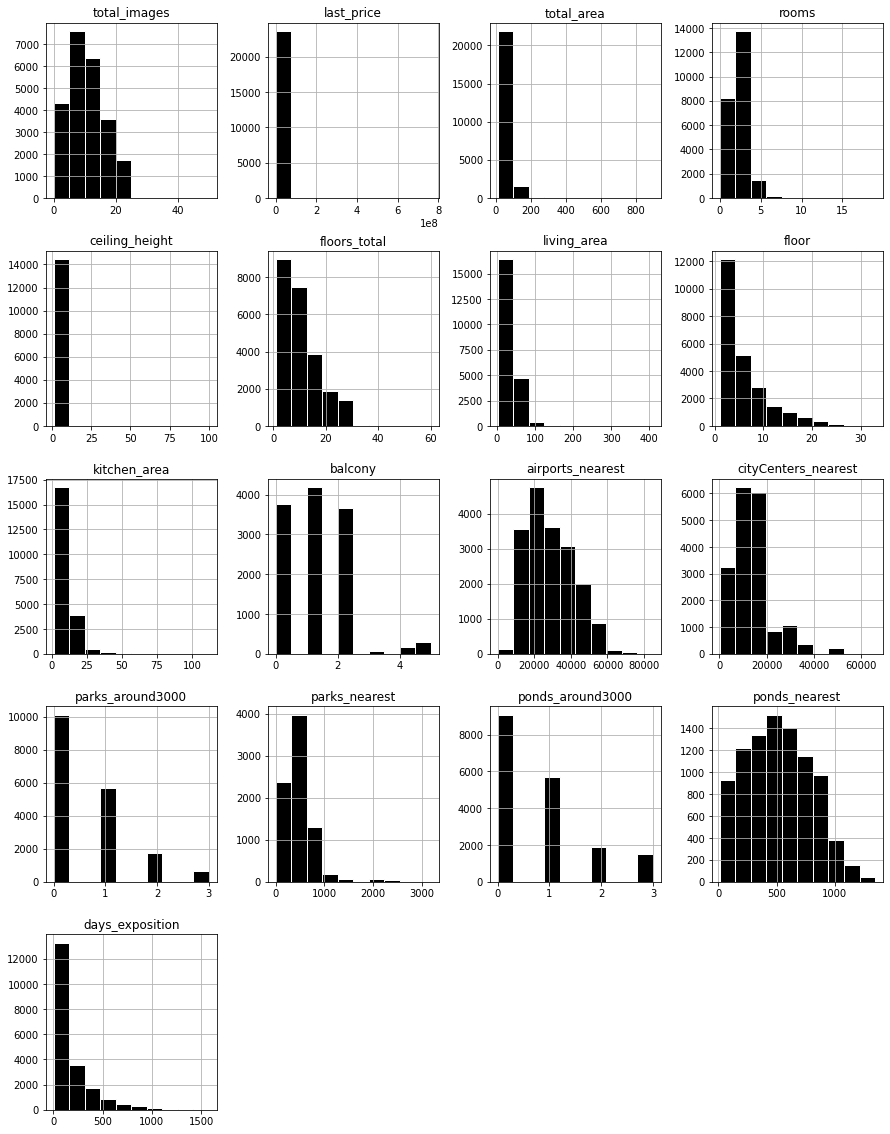

In [6]:
data.hist(figsize=(15, 20), color='black', ec='white')
None

Большинство людей стараются сопровождать объявления о продаже фотографиями.

С ценой по данной гистограмме разбираться пока не будем.

Почти все квартиры имеют площадь до 100 м кв.

Теперь я поняла смысл фразы «Санкт – Петербург ниже Москвы». Большая часть, выставленных на продажу, квартир находится в доме этажностью < 20. 

0, 1, 2 балкона – ок. Но 4 балкона? Это, видимо, в той квартире площадью 900 м.кв. 

Преобладающая часть квартир находятся в радиусе 20 – 30 км от аэропорта.

 **Предварительно на этапе предобработки данных необходимо сделать следующее:**
- переименовать названия колонок (выявленные нарушения: строчные буквы сочетаются с прописными, нет змеиного регистра)
- изменить тип данных столбцов:
	* ` floors_total ` — всего этажей в доме (количесвто этажей должно быть выражено целым числом);
	* ` is_apartment` — апартаменты (требуется булев тип данных);
	* ` balcony` — число балконов (количесвто балконов должно быть выражено целым числом);
	* ` parks_around3000` — число парков в радиусе 3 км (количесвто парков должно быть выражено целым числом);
    * ` ponds_around3000` — число водоёмов радиусе 3 км (количесвто водоемов должно быть выражено целым числом);
    * ` first_day_exposition` — дата публикации (требуется тип данных datetime);
    * ` days_exposition` — сколько дней было размещено объявление (от публикации до снятия).
- проверить на наличие дубликатов
- обработать пропущенные значения
- обработать аномальные значения

### Предобработка данных

**2.1. Переименование столбцов**

In [7]:
# вывод списка названий столбцов таблицы data
list(data.columns.values)

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [8]:
# переименование столбцов
data = data.rename(
       columns = {'cityCenters_nearest': 'city_centers_nearest', 
                  'parks_around3000': 'parks_around_3000', 
                  'ponds_around3000': 'ponds_around_3000'}
                  )
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**2.2. Пропуски**

In [9]:
# подсчет пропусков в количественном и процентном отношении
data_missing = {
              'missing_count': data.isnull().sum(),
              'missing_percent': data.isnull().sum()/len(data)*100
               }
                         
df_missing = pd.DataFrame(data_missing)
df_missing.sort_values('missing_count', ascending=False)

,missing_count,missing_percent
is_apartment,20924,88.290645
parks_nearest,15620,65.909954
ponds_nearest,14589,61.559559
balcony,11519,48.605426
ceiling_height,9195,38.799105
airports_nearest,5542,23.384953
city_centers_nearest,5519,23.287902
ponds_around_3000,5518,23.283683
parks_around_3000,5518,23.283683
days_exposition,3181,13.422507


**Причины пропусков и варианты их заполнения (если возможно):**
- **is_apartment** - при заполнении формы объявления люди пропускали этот пункт (возможно не знают разницу между квартирой и апартаментами). Посмотрим на то, какое количество комнат указано в соответствующих строках с пропусками: если >1, то заменим пропуски значением False, после чего посмотрим сколько пропусков осталось и уже примем решение.
- **parks_nearest** и **ponds_nearest** - автозаполняемые системой данные. Скорее всего данные не были выгружены системой. Оставим эти пропуски нетронутыми, так как они не повлияют на результаты анализа.
- **balcony** - пропуски в данном столбце могут означать отсутсвие балконов в квартире. Заменим данные пропуски на 0.
- **ceiling_height** - при заполнении формы объявления люди пропускали этот пункт (возможно по причине того, что высота потолков неизвестна или сочли данный параметр неважным для продажи квартиры, поэтому не предприняли действий для получения данной информации). Скорее всего будем заполнять средним значением по населенному пункту.
- **airports_nearest** и **city_centers_nearest** - расстояние до ближайшего аэропорта и до центра города рассчитывались системой автоматически. Возможно эти расстояния превышали заданный в системе радиус, поэтому появились пропуски. Оставим эти пропуски нетронутыми.
- **ponds_around_3000** и **parks_around_3000** - количество парков и водоемов в радиусе 3км. ~~Интересно, что количество пропусков в данных столбцах совпадает. Значит ли это, что если нет парка, значит, нет водоема?~~ В любом случае, данные так же являются автозаполняемые системой и скорее всего не были выгружены. Возможно указанных объектов не было обнаружено системой в радиусе 3км. Заменим пропуски 0.
- **days_exposition** - объявление могло остаться незакрытым при фактически совершенной сделке. Или могло быть закрыто сильно позже. В любом случае, данный параметр невозможно заполнить средним или медианным значением, поэтому оставим пропуски нетронутыми.
- **kitchen_area** и **living_area** - возможно данные параметры являются необязательными к заполнению. Хотя площадь квартиры является крайне важным фактором при выборе квартиры. В случае с кухней вероятнее всего люди не стали утруждать себя в поисках метража отдельной части квартиры. Как бы то ни было, посмотрим, есть ли связь между пропусками в этих столбцах и в квартирах- студиях. Заполнить данные пропуски средним или медианным значением невозможно (попробуем и убедимся, что все таки нет).
- **floors_total** и **locality_name** - вероятно продавцы квартир посчитали, что этажность дома не является важным параметром, а в случае с названием населенного пункта возможно посчитали нелогичным, ведь объявление выставляется в разделе с городом Санкт-Петербург. Так как количество пропущенных значений в этих столбцах составляет менее 1%, можно утверждать, что удаление строк с пропущенными значениями не повлияет на дальнейший анализ.

**floors_total** и **locality_name**

In [10]:
# удаление строк таблицы data с пропусками в столбцах floors_total и locality_name
data = data.dropna(subset=['floors_total', 'locality_name'])

**balcony**

In [11]:
# замена пропущенных значений в столбце balcony таблицы data на 0
data['balcony'] = data['balcony'].fillna(0)

**is_apartment**

In [12]:
# подсчет количества значений True и False в столбце is_apartment таблицы data
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [13]:
# подсчет количества пропущенных значений в столбце is_apartment таблицы data
data['is_apartment'].isna().sum()

20805

In [14]:
# замена пропущенных значений в столбце is_apartment таблицы data на False в тех строках, где комнат > 1
data.loc[(data['rooms'] > 1) & (data['is_apartment'].isna()), 'is_apartment'] = False

In [15]:
# подсчет количества пропусков в столбце is_apartment таблицы data
data['is_apartment'].isna().sum()

7268

В столбце **is_apartment** удалось избавиться больше, чем от половины пропусков. Теперь посчитаем количество пропусков в строках, где количетсво комнат равно 0, но в то же время в столбце **studio** указано False. После этого заменим пропуски в столбце **is_apartment** на True в тех квартирах, в которых 0 комнат, при этом они не являются студиями. Если в квартире 0 комнат и она не студия, значит, это апартаменты.

In [16]:
# подсчет пропущенных значений в столбце is_apartment таблицы data в тех строках, 
# где 0 комнат studio == False
data_is_apartment_missing = data.query(
    '(is_apartment != True) & (is_apartment != False) & (studio == False) & (rooms == 0)'
)
data_is_apartment_missing['is_apartment'].isna().sum()

58

In [17]:
# замена пропущенных значений в столбце is_apartment таблицы data на True в тех строках, 
# где 0 комнат studio == False
data.loc[
    (data['rooms'] == 0) & (data['is_apartment'].isna()) & (data['studio'] == False), 'is_apartment'] = True

Теперь сделаем наоборот. Посчитаем количество пропусков в строках, где количетсво комнат равно 0, но в то же время в столбце **studio** указано True. После этого заменим пропуски в столбце **is_apartment** на False в тех квартирах, в которых 0 комнат, при этом они являются студиями. Если в квартире 0 комнат она является студией, значит, это не апартаменты.

In [18]:
# подсчет пропущенных значений в столбце is_apartment таблицы data в тех строках, 
# где 0 комнат и studio == True
data_is_apartment_missing = data.query(
    '(is_apartment != True) & (is_apartment != False) & (studio == True) & (rooms == 0)'
)
data_is_apartment_missing['is_apartment'].isna().sum()

130

In [19]:
# замена пропущенных значений в столбце is_apartment таблицы data на False в тех строках, 
# где 0 комнат и studio == True
data.loc[
    (data['rooms'] == 0) & (data['is_apartment'].isna()) & (data['studio'] == True), 'is_apartment'] = False

In [20]:
# подсчет пропущенных значений в столбце is_apartment таблицы data
data['is_apartment'].isna().sum()

7080

Таким образом, в квартирах с > 1 комнатой заменили пропуски на False. Квартиры с 0 комнат и не являющиеся студиями сделали апартаментами, а в квартирах с 0 комнат и являющиеся студиями, пропуски в **is_apartment** заменили значением False. Из 20 с лишним тысяч пропусков осталось 7080. Оставшиеся пропуски заменим на False, чтобы при изменении типа данных столбца **is_apartment** пропуски Nan не считались как True.

In [21]:
# подсчет количества значений True и False в столбце is_apartment таблицы data
data['is_apartment'].value_counts()

False    16377
True       108
Name: is_apartment, dtype: int64

**kitchen_area**

In [22]:
# подсчет количества пропущенных значений в столбце kitchen_area таблицы data
data['kitchen_area'].isnull().sum()

2222

Посчитаем количество студий в таблице *data* и количество пропущенных значений в столбце **kitchen_area** в строках с квартирой- студией. Заменим значения столбца **kitchen_area** в строках с квартирой- студией на 0.

In [23]:
# подсчет количества студий
data.query('studio == True')['studio'].count()

146

In [24]:
# подсчет количества пропускова столбца kitchen_area в строках с квартирами- студиями
data.query('studio == True')['kitchen_area'].isnull().sum()

146

Во всех студиях пропущено значение в столбце **kitchen_area**

In [25]:
# замена значений столбца kitchen_area таблицы data нулем в строках с квартирами- студиями
data.loc[
    (data['studio'] == True) &
    (data['kitchen_area'].isna()), 'kitchen_area'] = 0

Попробуем заполнить пропуски в оставшихся строках медианным значением по этажности дома.

Изначально в 3 строке в **kitchen_area** был пропуск, сейчас стоит медианное значение по квартирам с 14 эатажами ~9 м.кв. при общей площади квартиры 159 м.кв. Если посмотреть на 4 строку с такой же этажностью дома и общей площадью 100 м.кв., можно заметить, что площадь кухни в данной квартире состовляет 41 м.кв. Очевидно, что заполнение данных пропусков медианным или средним значением может сильно исказить данные. Поэтому оставшиеся пропуски не трогаем.

Аналогичная ситуация с пропусками в столбце **living_area**. Оставим их нетронутыми.

**parks_nearest** и **ponds_nearest** оставляем нетронутыми. Заменять средним или медианным по населенному пункту, очевидно, бессмысленно, так как данные по Санкт- Петербургу будут неправдопадобными. По имеющимся данным можно сделать срез и изучить закономерность.

**ponds_around_3000** и **parks_around_3000**. Как описывала ранее, данные могли быть не выгружены системой или причина пропусков - отсутсвие парков и водоемов в заданном радиусе. Заменим пропуски на 0.

In [26]:
# замена пропущенных значений в столбце ponds_around_3000 таблицы data на 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
# замена пропущенных значений в столбце parks_around_3000 таблицы data на 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

**city_centers_nearest**

Попробуем заменить пропуски в данном столбце средним значением по населенному пункту. Скорее всего, от большинства пропусков мы не сможем избавиться, так как населенных пунктов много и далеко не по каждому будет возможность рассчитать среднее по значениям расстояния до центра города.

In [27]:
# подсчет количества пропущенных значений в столбце city_centers_nearest таблицы data
data['city_centers_nearest'].isna().sum()

5501

In [28]:
# циклом проходимся по уникальным названиям населенных пунктов и заполняем пропущенные значения в столбце
# city_centers_nearest медианным значением 
for l in data['locality_name'].unique():
    data.loc[(data['locality_name'] == l) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == l), 'city_centers_nearest'].mean()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [29]:
# подсчет количества пропущенных значений в столбце city_centers_nearest таблицы data
data['city_centers_nearest'].isna().sum()

5432

Оставшиеся пропуски не трогаем.

**ceiling_height**

Заменим пропуски в данном столбце средним значением по населенному пункту.

In [30]:
# подсчет количества пропущенных значений в столбце city_centers_nearest таблицы data
data['ceiling_height'].isna().sum()

9084

In [31]:
# циклом проходимся по уникальным названиям населенных пунктов и заполняем пропущенные значения в столбце
# city_centers_nearest медианным значением 
for l in data['locality_name'].unique():
    data.loc[(data['locality_name'] == l) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == l), 'ceiling_height'].mean()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.644444,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.803717,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.803717,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [32]:
# подсчет количества пропущенных значений в столбце city_centers_nearest таблицы data
data['ceiling_height'].isna().sum()

120

Оставим эти пропуски.

**2.3. Дубликаты**

На данном этапе проверим наличие явных и неяных дубликатов. В случае наличия явнхы дубликатов, удалим строки и восстановим индексы. Для того, чтобы избавиться от неявных дубликатов в столбце **locality_name**, заменим все буквы в названии населенных пунктов на строчные, все буквы ё на е, заменим тип населенного пунка на пробел, после чего с помощью функции lstrip() удалим пробелы в начале каждой строки.

In [33]:
# подсчет явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутсвуют

In [34]:
# вывод списка уникалых наименований населенного пункта
list(data['locality_name'].unique())

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [35]:
# нахождение длины списка уникальных наименований
len(data['locality_name'].unique())

364

In [36]:
# приведение всех букв столбца к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
# замена всех букв "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
len(data['locality_name'].unique())

330

In [37]:
# создание списка с видами всех населенных пунктов
name_locality = ['поселок городского типа', 'поселок при железнодорожной станции', 'садовое товарищество', 'городской поселок', 'коттеджный поселок', 'поселок станции', 'садоводческое некоммерческое товарищество', 'поселок', 'деревня', 'село']
# замена названий видов населенных пунктов пробелом
for name in name_locality:
    data['locality_name'] = data['locality_name'].str.replace(name, ' ') 

In [38]:
# удаление пробела в начале каждой строки столбца locality_name с помощью функции lstrip()
data['locality_name'] = data['locality_name'].str.lstrip()

In [39]:
len(data['locality_name'].unique())

305

Избавились от 59 неявных дубликатов.

**2.4. Изменение типов данных**

Изменить тип данных столбцов: 
* ` floors_total ` — всего этажей в доме (количесвто этажей должно быть выражено целым числом);
* ` balcony` — число балконов (количесвто балконов должно быть выражено целым числом);
* ` parks_around_3000` — число парков в радиусе 3 км (количесвто парков должно быть выражено целым числом);
* ` ponds_around_3000` — число водоёмов радиусе 3 км (количесвто водоемов должно быть выражено целым числом);
* ` first_day_exposition` — дата публикации (требуется тип данных datetime);
* ` days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* ` last_price` — цена на момент снятия с публикации (цену оставим в рублях, копейки при покупке квартиры не играют роли); 

Все данные типа float округлим до одного знака после запятой.

In [40]:
# создание списка с названиями столбцов, в которых будем менять тип данных
list_for_changes = ['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'last_price']
# циклом проходим по всем столбцам из списка и для непустых значений меняем тип данных на целочисленный
for column in list_for_changes:
    data[column] = data[data[column].notnull()][column].astype('int')
# проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.700000,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.644444,11,18.6,1,NaN,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.803717,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.803717,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.030000,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


Изменяю формат столбца **first_day_exposition** на datetime, так как из этого столбца необходимо добавлять новые столбцы

In [41]:
# изменение типа данных столбца first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [42]:
# создание списка с названиями столбцов, в которых будем округлять значения
rounding_list = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 
                 'city_centers_nearest','parks_nearest', 'ponds_nearest']
# циклом проходим по всем столбцам из списка и для непустых значений округляем до 1 знака после запятой
for column in rounding_list:
    data[column] = data[data[column].notnull()][column].round(1)
# проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.8,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**2.5. Работа с аномальными данными**

На данном этапе проверим, какие есть выбивающиеся или аномальные значения построением ящика с усами. Начнем с количества комнат.

**rooms**

<AxesSubplot:>

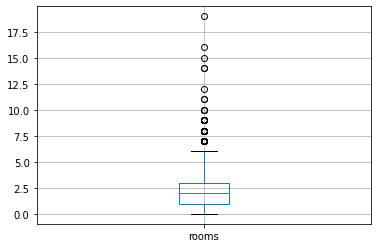

In [43]:
# строим диаграмму размаха по столбцу rooms
data.boxplot('rooms')

На диаграмме видно несколько выбивающихся значений, пределы нормальных значений от 0 до 7 комнат. 
Посчтиаем, сколько квартир находятся за пределами нормальных значений.

In [44]:
# подсчет квартир с количеством комнат > 7
data.query('rooms > 7')['rooms'].count()

31

31 строку можно удалить из таблицы, так как данные значения могут в дальнейшем повлиять на анализ.

Проверю входит ли в этот список квартира площадью 900 кв.м.

In [45]:
data.query('(rooms > 7) and (total_area > 500)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5358,20,65000000,590.0,2019-02-14,15,3.5,6,409.0,3,False,False,False,100.0,0,санкт-петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Интересный дворец, в котором в среднем на одну из 12 комнат приходится полторы моей однушки.
Но он так же попадет под удаление.

In [46]:
# удаляем данные строки из таблицы data
data = data[data['rooms'] < 7]

<AxesSubplot:>

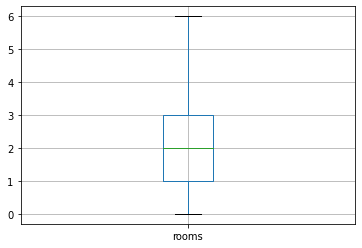

In [47]:
# проверяем, все хорошо
data.boxplot('rooms')

**balcony**

Теперь разберемся с балконами. Так же воспользуемся диаграммой размаха.

<AxesSubplot:>

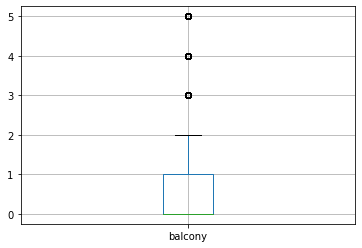

In [48]:
# строим диаграмму размаха по столбцу balcony
data.boxplot('balcony')

Медиана в 0, а все, что больше 2 - выбивающиеся значения. Но что-то мне подсказывает, что в квартире вполне приемлемо наличие 3 или 4 балконов. Проверим, сколько в наличии квартир с количеством балконов больше 2 и что это за квартиры.

In [49]:
# подсчет квартир с количеством балконов > 2
data_balcony = data.query('balcony > 2')
data_balcony['balcony'].count()

564

In [50]:
# группировка таблицы data_balcony по количеству комнат и балконов
data_balcony.groupby(['rooms', 'balcony']).size().unstack()

balcony,3,4,5
rooms,,,
1,2,16,25
2,21,61,83
3,41,82,166
4,12,18,23
5,4,5,5


25 однокомнатных квартир с 5 балконами? Также вряд ли есть однушки с 3 балконами. Удалим 564 квартиры с количеством балконов > 2.

In [51]:
# перезапись таблицы data с исключением строк
data = data[data['balcony'] <= 2]

<AxesSubplot:>

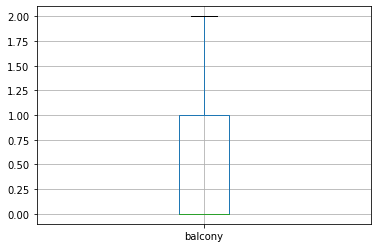

In [52]:
# проверка
data.boxplot('balcony')

**ceiling_height**

Посмотрим, что с высотой потолков. 

<AxesSubplot:>

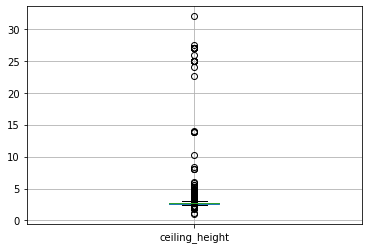

In [53]:
# строим диаграмму размаха по столбцу ceiling_height
data.boxplot('ceiling_height')

Разберемся, откуда взялось столько выбросов. Посмторим, какие значения находятся в столбце **ceiling_height** с условием высота потолков > 15.

In [54]:
# делаем срез данных с соответсвующим условием и выводи первые 10 строк
data.query('ceiling_height > 15').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,False,False,NaN,2,гатчина,NaN,NaN,0,NaN,0,NaN,259.0
2158,15,1500000,42.0,2017-12-23,2,27.0,2,29.0,2,False,False,False,5.5,0,мины,NaN,NaN,0,NaN,0,NaN,NaN
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,волхов,NaN,NaN,0,NaN,0,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,False,False,7.0,1,санкт-петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,True,False,True,NaN,2,мурино,NaN,NaN,0,NaN,0,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,False,False,5.5,0,санкт-петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,False,9.0,2,мины,NaN,NaN,0,NaN,0,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,False,False,False,7.0,2,санкт-петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,False,False,False,5.7,0,кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,False,False,False,5.2,0,санкт-петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


Вероятно, эти значения обозначают высоту потолков/ 10. В строках со значением высоты потолка > 15 разделим его на 10.

In [55]:
# с помощью loc добавим условие и соответсвующие значения делим на 10
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data['ceiling_height'] / 10

<AxesSubplot:>

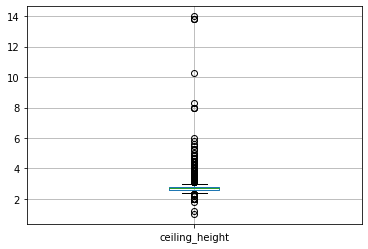

In [56]:
# проверка выбросов
data.boxplot('ceiling_height')

Все равно осталось много выбросов за пределами нормальных значений. Посчитаем количество выбросов, которые находятся за пределами значений от 2 до 4 метров.

In [57]:
# подсчет количества значений столбца ceiling_height, находящихся за пределами нормальных значений в срезе данных
data.query('(ceiling_height < 2) | (ceiling_height > 4)')['ceiling_height'].count()

60

Перезапишем таблицу data, исключив 60 строк с выбросами в столбце **ceiling_height**. Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра.

In [58]:
# удаление строк
data = data[(data['ceiling_height'] > 2.4) & (data['ceiling_height'] < 4)]

<AxesSubplot:>

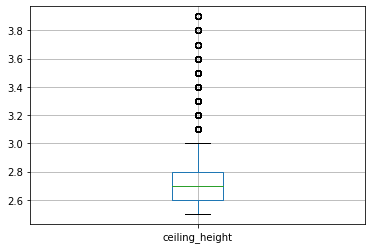

In [59]:
# проверка выбросов
data.boxplot('ceiling_height')

Оставшиеся значения оставим, так как высота потолков более 3 м приемлема.

**total_area**

<AxesSubplot:>

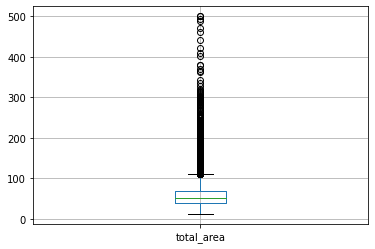

In [60]:
# строим диаграмму размаха по столбцу total_area
data.boxplot('total_area')

Достаточно много выбросов. Посчитаем количество квартир, площадь которых превышает 150 км.м.

In [61]:
# подсчет количества значений столбца total_area
data.query('total_area > 150')['total_area'].count()

438

Не удалять же 438 строк только из-за того, что кто-то имеет возможность купить такую квартиру. Только хочется проверить как соотносятся общая площадь квартиры с жилой площадью. Проверим, есть ли среди этих квартир такие, где жилая площадь наполовину меньше общей.

In [62]:
# срез данных с соответсвующим условием
data.query('(total_area > 150) & (living_area < total_area/2)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
51,7,45000000,161.0,2017-10-17,3,3.2,8,38.0,4,False,False,False,50.0,0,санкт-петербург,32537.0,6589.0,0,NaN,3,99.0,541.0
492,18,95000000,216.0,2017-12-05,4,3.0,5,86.0,4,False,False,False,77.0,0,санкт-петербург,21740.0,436.0,2,138.0,3,620.0,14.0
679,13,13700000,200.0,2017-09-27,4,2.9,4,90.0,1,False,False,False,35.0,0,петергоф,38993.0,34182.0,1,233.0,1,234.0,172.0
869,14,10335000,170.0,2017-09-11,5,3.0,16,81.0,11,False,False,False,NaN,0,санкт-петербург,46411.0,15247.0,1,672.0,0,NaN,35.0
1519,13,22000000,174.0,2014-12-10,4,2.8,4,80.9,2,False,False,False,17.6,0,петергоф,35416.0,30605.0,2,47.0,1,907.0,1133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22980,19,24500000,155.4,2017-10-10,3,3.0,4,72.0,2,False,False,False,65.0,0,санкт-петербург,43758.0,15461.0,1,756.0,2,278.0,325.0
23181,20,22220000,170.7,2019-02-12,4,3.2,5,82.0,4,False,False,False,35.1,0,санкт-петербург,24503.0,4909.0,1,230.0,0,NaN,NaN
23281,20,24800000,231.2,2015-01-21,6,3.1,5,99.8,4,False,False,False,27.4,0,санкт-петербург,21480.0,2453.0,3,75.0,1,795.0,NaN
23327,19,34400000,215.0,2019-03-15,5,2.8,4,82.4,4,False,False,False,40.1,0,санкт-петербург,37268.0,15419.0,0,NaN,0,NaN,NaN


Мне кажется довольно странные данные. При общей площади квартиры в 216 кв.м., жилая и кухня в сумме дают только 163 кв.м. И такое почти в каждой строке. Удалим эти строки из таблицы

In [63]:
# удалние строк
index = data[(data['total_area'] > 150) & (data['living_area'] < data['total_area']/2)].index
data.drop(index, inplace=True)

Проверим, какой процент исходных данных был удален.

In [64]:
data_del = 100 - len(data)/23699*100
data_del

4.915819232879031

На данном этапе выполнена предобработка данных: переименование столбцов, удаление строк с пропусками в столбцах **floors_total** и **locality_name**, заполнение пропусков (где это возможно сделать, чтобы не исказить данные), избавление от неявных дубликатов в названиях населенных пунктов, изменение типов данных, округление вещественных значениий, обработка аномальных значений и выбросов. В процессе предобработки данных было удалено ~ 5% данных. Пропуски удалось заполнить не везде, значит, по необходимости буду использовать срезы  таблицы *data* для анализа.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:

    - цена одного квадратного метра;
    - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    - месяц публикации объявления;
    - год публикации объявления;
    - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Добавим в таблицу data столбец **price_one_sq_m** - стоимость одного квадратного метра. Для этого разделим стоимость квартиры на площадь. Так как значения в столбце площади типа float, после добавления столбца переведем его значения в целочисленные.

In [65]:
# добавление столбца price_one_sq_m в таблицу data
data['price_one_sq_m'] = data['last_price'] / data['total_area']
# изменение типа данных столбца price_one_sq_m на int
data['price_one_sq_m'] = data['price_one_sq_m'].astype('int')

In [66]:
# добавление столбца дня недели
data['weekday'] = data['first_day_exposition'].dt.weekday

In [67]:
# создание функции для названий дней недели
def weekday(day):
    try:
        if day == 0:
            return 'понедельник'
        elif day == 1:
            return 'вторник'
        elif day == 2:
            return 'среда'
        elif day == 3:
            return 'четверг'
        elif day == 4:
            return 'пятница'
        elif day == 5:
            return 'суббота'
        elif day == 6:
            return 'воскресенье'
    except:
        return 'нет категории'

In [68]:
# применение функцию weekday и добавление столбца с названием дня недели
data['weekday_name'] = data['weekday'].apply(weekday)

In [69]:
# добавление столбца с информацией о месяце продажи квартиры
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [70]:
# добавление столбца с информацией о годе продажи квартиры
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [71]:
# создание функции для определения типа этажа
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'не указан'

In [72]:
# применение функцию floor_type к каждой строке таблицы data и добавление столбца с типов этажа
data['floor_type'] = data.apply(floor_type, axis=1)

In [73]:
# добавление столбца с расстоянием от квартиры до центра города в км
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

In [74]:
# округление значений столбца city_centers_nearest_km до одного знака после запятой
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round(1)

In [75]:
# проверка
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_sq_m,weekday,weekday_name,month_publication,year_publication,floor_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,четверг,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,вторник,12,2018,первый,18.6
2,10,5196000,56.0,2015-08-20,2,2.8,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,четверг,8,2015,другой,13.9
3,0,64900000,159.0,2015-07-24,3,2.8,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,пятница,7,2015,другой,6.8
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,вторник,6,2018,другой,8.1
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,False,False,9.1,0,янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,понедельник,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,NaN,False,False,14.4,1,парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195,3,четверг,11,2017,другой,19.1
7,5,7915000,71.6,2019-04-18,2,2.8,24,NaN,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544,3,четверг,4,2019,другой,11.6
8,20,2900000,33.2,2018-05-23,1,2.9,27,15.4,26,NaN,False,False,8.8,0,мурино,NaN,NaN,0,NaN,0,NaN,189.0,87349,2,среда,5,2018,другой,NaN
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524,6,воскресенье,2,2017,другой,15.0


### Проведите исследовательский анализ данных

На данном этапе изучим каждый параметр, скорость продажи квартир, влияние факторов на общую стоимость квартир, посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, определим, как стоимость квартиры зависит от удаленности от центра города.

**4.1. Изучим каждый параметр отдельно**

**total_area**

,total_area
count,22534.000000
mean,58.177891
std,29.481660
min,12.000000
25%,40.000000
50%,51.000000
75%,68.000000
max,500.000000


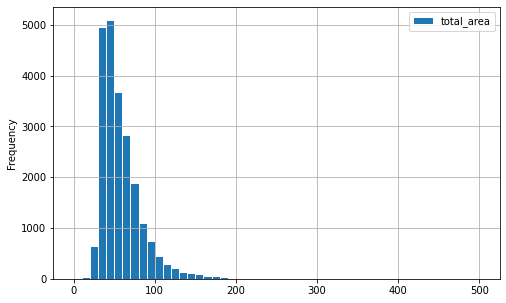

In [76]:
# посторение гистограммы для столбца total_area
data.plot(y='total_area', kind='hist', bins=50, grid=True, figsize=(8,5), range=(0,500), ec='white')
# вывод общей информации для столбца total_area
data['total_area'].describe().to_frame()

Рассмотрим ближе распределние по общей площади квартир в пиковой зоне.

<AxesSubplot:ylabel='Frequency'>

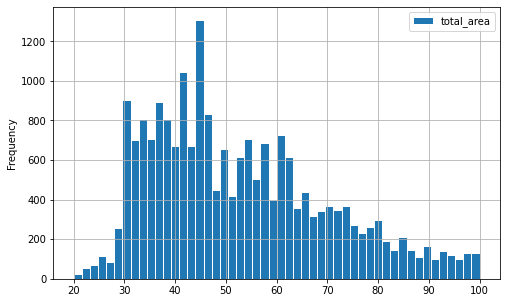

In [77]:
# посторение гистограммы для столбца total_area
data.plot(y='total_area', kind='hist', bins=50, grid=True, figsize=(8,5), range=(20,100), ec='white')

Площадь квартир в объявлениях о продаже колеблется от 12 до 500 кв.м. Среднее значение по площади примерно равно медиане. Можно утверждать, что в среднем площадь, выставленных на продажу, квартир составляет  58 кв.м. Метраж большей части квартир находится в промежутке от 30 до 80 кв.м. Пик приходится на 45 кв.м.

**living_area**

,living_area
count,20746.000000
mean,33.262648
std,19.034839
min,2.000000
25%,18.400000
50%,30.000000
75%,41.900000
max,300.000000


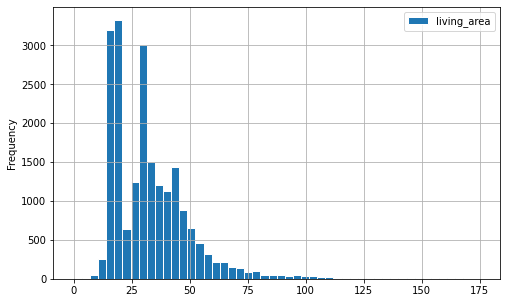

In [78]:
# посторение гистограммы для столбца living_area
data.plot(y='living_area', kind='hist', bins=50, grid=True, figsize=(8,5), range=(0,175), ec='white')
# вывод общей информации для столбца living_area
data['living_area'].describe().to_frame()

<AxesSubplot:ylabel='Frequency'>

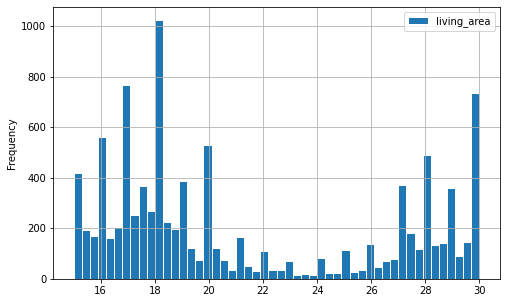

In [79]:
data.plot(y='living_area', kind='hist', bins=50, grid=True, figsize=(8,5), range=(15,30), ec='white')

Жилая площадь квартир в объявлениях о продаже колеблется от 2 до 300 кв.м. Среднее значение по жилой площади примерно равно медиане. Можно утверждать, что в среднем жилая площадь, выставленных на продажу, квартир в Санкт- Петербурге составляет 33 кв.м. Пик жилой площади приходится  на 18 и 30 кв.м. Можно сделать вывод, что малая часть квартир имеет жилую площадь от 20 до 25 кв.м.

**kitchen_area**

,kitchen_area
count,20531.000000
mean,10.249360
std,5.306377
min,0.000000
25%,7.000000
50%,9.000000
75%,11.700000
max,100.700000


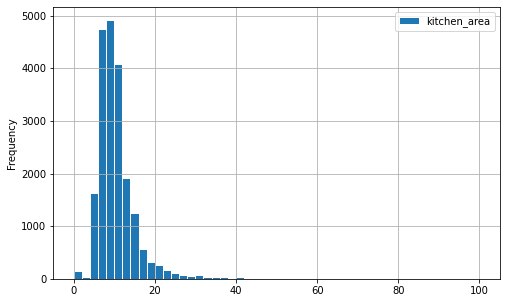

In [80]:
# посторение гистограммы для столбца kitchen_area
data.plot(y='kitchen_area', kind='hist', bins=50, grid=True, figsize=(8,5), range=(0,100), ec='white')
# вывод общей информации для столбца kitchen_area
data['kitchen_area'].describe().to_frame()

Площадь кухни в квартирах на продажу колеблется от 0 до 100 кв.м. Площадь кухни может составлять 0 кв.м. в квартирах- студиях, где нет разделения на жилую и кухонную зону. В любом случае, в среднем площадь кухни квартир Санкт- Петербурга составляет 10 кв.м., что также является пиком.

**last_price**

Для удобства считывания информации приведем столбец **last_price** к тысячам.

In [81]:
data['last_price'] = data['last_price']/1000

,last_price
count,22534.000000
mean,6112.794021
std,7461.942701
min,12.190000
25%,3400.000000
50%,4600.000000
75%,6600.000000
max,330000.000000


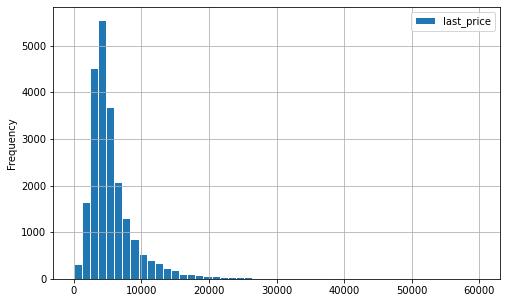

In [82]:
# посторение гистограммы для столбца last_price
data.plot(y='last_price', kind='hist', bins=50, grid=True, figsize=(8,5), range=(0,60000), ec='white')
# вывод общей информации для столбца last_price
data['last_price'].describe().to_frame()

Определим пиковую стоимость квартир

<AxesSubplot:ylabel='Frequency'>

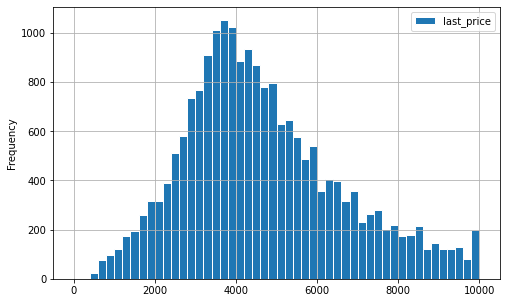

In [83]:
# посторение гистограммы для столбца last_price
data.plot(y='last_price', kind='hist', bins=50, grid=True, figsize=(8,5), range=(0,10000), ec='white')

В представленных объявлениях можно найти квартиру как за 12 тысяч рублей, так и за 330 миллионов рублей. Средняя стоимость квартир отличается от медианы и составляет 6 млн 100 тысяч рублей в то время, как медиана составляет 4 млн 600 тысяч рублей, что говорит о наличии выбросов в данной выборке. Стоимость большей части квартир находится в промежутке от 3 до 6 млн рублей.

**rooms**

,rooms
count,22534.000000
mean,2.020991
std,0.995955
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


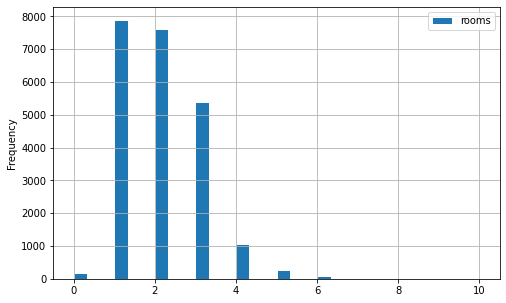

In [84]:
# посторение гистограммы для столбца rooms
data.plot(y='rooms', kind='hist', bins=30, grid=True, figsize=(8,5), range=(0,10), ec='white')
# вывод общей информации для столбца last_price
data['rooms'].describe().to_frame()

Количество комнат от 0 до 6 (с учетом исключения многокомнатных квартир с количеством комнат более 7). То есть присутствуют и студии, и многокомнатные квартиры. Большая часть квартир, выставленных на продажу, являются однокомнатными и двухкомнатными. 

**ceiling_height**

,ceiling_height
count,22534.000000
mean,2.733188
std,0.204051
min,2.500000
25%,2.600000
50%,2.700000
75%,2.800000
max,3.900000


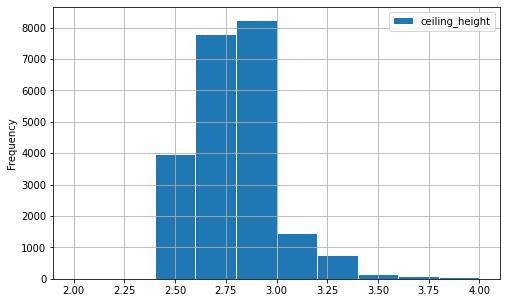

In [85]:
# посторение гистограммы для столбца ceiling_height
data.plot(y='ceiling_height', kind='hist', bins=10, grid=True, figsize=(8,5), range=(2,4), ec='white')
# вывод общей информации для столбца ceiling_height
data['ceiling_height'].describe().to_frame()

Минимальная высота потолков составляет 2.5 метра, а максимальная почти 4 м. Средняя высота потолков совпадает с медианой и равна 2.7 м. Пик приходится на 2.75 м.

**floor**

,floor
count,22534.000000
mean,5.868022
std,4.860124
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,33.000000


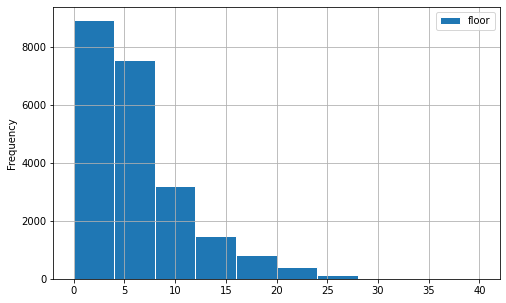

In [86]:
# посторение гистограммы для столбца floor
data.plot(y='floor', kind='hist', bins=10, grid=True, figsize=(8,5), range=(0,40), ec='white')
# вывод общей информации для столбца floor
data['floor'].describe().to_frame()

Минимальный этаж среди квартир, выставленных на продажу – первый, максимальный – 33. Большая часть представленных квартир расположилась с 1 по 10 этаж.

**floors_total**

,floors_total
count,22534.000000
mean,10.720467
std,6.596996
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,60.000000


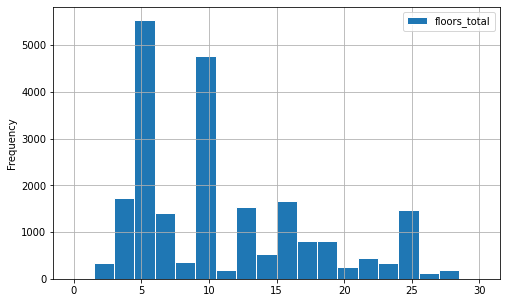

In [87]:
# посторение гистограммы для столбца floors_total
data.plot(y='floors_total', kind='hist', bins=20, grid=True, figsize=(8,5), range=(0,30), ec='white')
# вывод общей информации для столбца floor
data['floors_total'].describe().to_frame()

Интересно, но минимальная этажность дома составляет 1 этаж, максимальная – 60 этажей. Больше всего квартир продается в домах этажность 5 и 10.

**city_centers_nearest**

,city_centers_nearest
count,17380.000000
mean,14265.564499
std,8602.890418
min,181.000000
25%,9425.000000
50%,13143.000000
75%,16299.250000
max,65968.000000


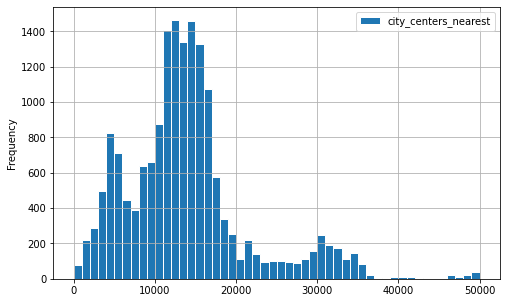

In [88]:
# посторение гистограммы для столбца city_centers_nearest
data.plot(y='city_centers_nearest', kind='hist', bins=50, grid=True, figsize=(8,5), range=(0,50000), ec='white')
# вывод общей информации для столбца city_centers_nearest
data['city_centers_nearest'].describe().to_frame()

Минимальное расстояние до центра города составляет 181 м, а максимальное почти 66 км. В среднем квартиры находятся на расстоянии 14 км от центра города. Большая часть квартир расположена на расстоянии от 10 до 20 км от центра.

**airports_nearest**

,airports_nearest
count,17296.000000
mean,28789.591004
std,12685.660478
min,0.000000
25%,18488.000000
50%,26765.500000
75%,37310.000000
max,84869.000000


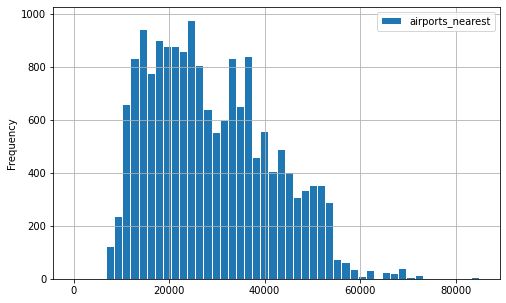

In [89]:
# посторение гистограммы для столбца airports_nearest
data.plot(y='airports_nearest', kind='hist', bins=50, grid=True, figsize=(8,5), range=(0,85000), ec='white')
# вывод общей информации для столбца city_centers_nearest 
data['airports_nearest'].describe().to_frame()

Минимальное расстояние от квартиры до аэропорта составляет 0 метров (кому-то повезло), максимальное расстояние – почти 85 км. В среднем квартиры расположены на расстоянии 27- 29 км от аэропорта. Большая часть квартир расположена на расстоянии от 10 до 35 км от аэропорта.

**parks_nearest**

,parks_nearest
count,7616.000000
mean,490.759585
std,341.220722
min,1.000000
25%,288.000000
50%,454.000000
75%,612.000000
max,3190.000000


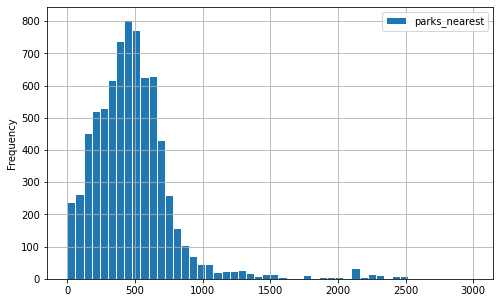

In [90]:
# посторение гистограммы для столбца parks_nearest
data.plot(y='parks_nearest', kind='hist', bins=50, grid=True, figsize=(8,5), range = (0,3000), ec='white')
# вывод общей информации для столбца parks_nearest 
data['parks_nearest'].describe().to_frame()

Минимальное расстояние от квартиры до парка составляет 1 метр, максимальное расстояние – 3 км. В среднем квартиры расположены в полукилометре от парков. Большая часть квартир расположена на расстоянии от 100 до  800м от парков.

**weekday**

,weekday
count,22534.000000
mean,2.565723
std,1.786702
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,6.000000


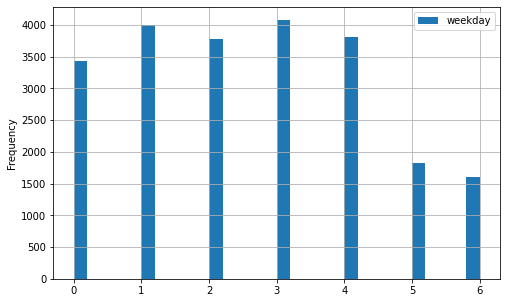

In [91]:
# посторение гистограммы для столбца weekday
data.plot(y='weekday', kind='hist', bins=30, grid=True, figsize=(8,5))
# вывод общей информации для столбца weekday 
data['weekday'].describe().to_frame()

В выходные выставляют меньше объявлений. В будние дни распределение по количеству выставленных объявлений примерно одинаковое. Но в четверг опубликованных объявлений больше, чем в любой другой день. 

**month_publication**

,month_publication
count,22534.000000
mean,6.398775
std,3.490346
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,12.000000


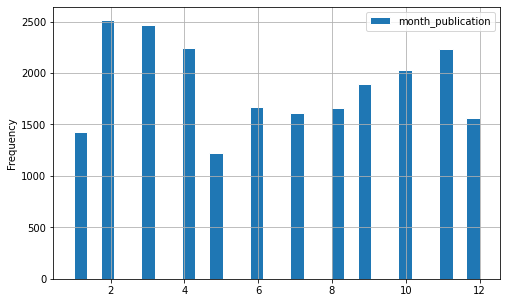

In [92]:
# посторение гистограммы для столбца month_publication
data.plot(y='month_publication', kind='hist', bins=30, grid=True, figsize=(8,5), ec='white')
# вывод общей информации для столбца month_publication 
data['month_publication'].describe().to_frame()

Можно сделать вывод, что в летний период наступает затишье с его отпусками и отдыхом людей и публикаций объявлений становится меньше. С настусплением весны количество предложений увеличивается до декабря (вероятно люди начинают готовиься к праздникам и потом еще в январе собираются с мыслями). 

**4.2. Изучение скорости продажи квартир**

Выполним построение гистограммы, найдем среднее и медиану значений столбца **days_exposition**.

In [93]:
data['days_exposition'].describe().to_frame()

,days_exposition
count,19577.000000
mean,179.655718
std,218.859376
min,1.000000
25%,44.000000
50%,94.000000
75%,229.000000
max,1572.000000


Медиана равна 94. В среднем квартиры продавались 180 дней - полгода. Максимальное время продажи квартиры - 1572 дня. Неужели квартира продавалась более 4 лет? Минимальное время продажи квартиры - 1 день. Значение медианы и среднего сильно отличаются, что может говорить о неправдободобности данных. Посторим гистограмму и диаграмму размаха.

<AxesSubplot:ylabel='Frequency'>

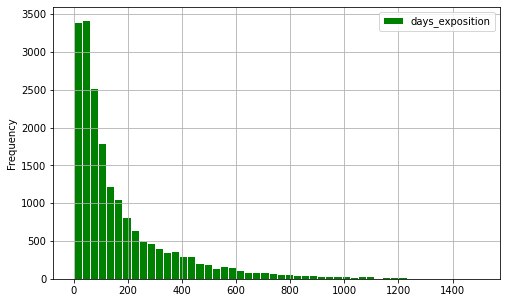

In [94]:
data.plot(y='days_exposition', kind='hist', grid=True, figsize=(8,5), bins=50, range=(0, 1500), ec='white', color='green')

Большая часть квартир продавалась в первые 50 дней. Посмотрим, что с выбросами.

<AxesSubplot:>

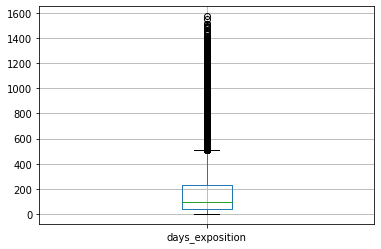

In [95]:
data.boxplot('days_exposition')

Ограничим срок продажи квартиры 500 днями и еще раз посмотрим на гистограмму.

<AxesSubplot:ylabel='Frequency'>

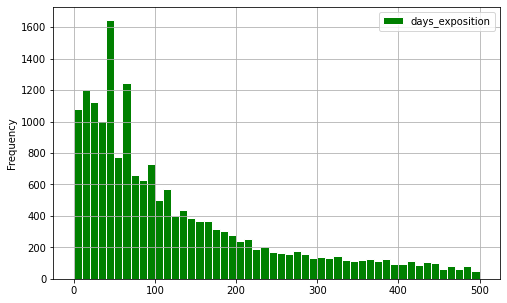

In [96]:
data.query('days_exposition < 500').plot(y='days_exposition', kind='hist', grid=True, figsize=(8,5), bins=50, range=(0, 500), ec='white', color='green')

Выглядит вполне логично - с увеличением времени продажи, количество квартир уменьшается, но откуда два пиковых значения. Рассмотрим ближе.

<AxesSubplot:ylabel='Frequency'>

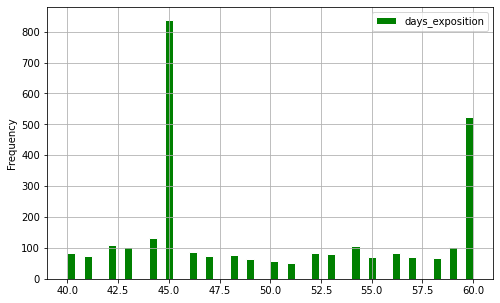

In [97]:
data.query('days_exposition < 500').plot(y='days_exposition', kind='hist', grid=True, figsize=(8,5), bins=50, range=(40, 60), ec='white', color='green')

Вероятно, что на 45 и 60 день с момента публикации объявления, происходит его автоматическое закрытие.

**4.3. Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта**

Изучим следующие факторы:
* общая площадь;
* жилая площадь;
* площадь кухни;
* количество комнат;
* этаж, на котором расположена квартира (первый, последний, другой);
* дата размещения (день недели, месяц, год).

Гипотеза состоит в следующем:
- стоимость квартиры напрямую зависит от общей площади, площади кухни и жилой площади квартиры. Чем больше площадь, тем выше стоимость квартиры (конечно, если исключить фактор расположения квартиры). Квартира с меньшей площадью в центре будет стоить дороже квартиры на окраине города;
- чем больше комнат, тем выше стоимость квартиры;
- цены на квартиры на первых этажах ниже, чем на последнем и других;
- день недели размещения объявлений не играет роли при оценивании квартиры;
- стоимость квартиры зависит от месяца размещения объявления. 


**Изучим зависимость цены от метража квартиры, жилой части и кухонной части**

In [98]:
# создание функции param_vs_price
def param_vs_price(df, column):
    # создание словаря для заголовков графиков
    title = {'total_area':'Зависимость цены от общей площади', 'living_area': 'Зависимость цены от жилой площади',
             'kitchen_area': 'Зависимость цены от площади кухни'}
    # создание сводной таблицы, подсчет медианы значений столбца last_price
    df_pivot = df.pivot_table(index=column, values='last_price', aggfunc='median')
    df_pivot.columns = ['median']
    # задание графика зависимости стоимости квартиры от соответсвующего параметра
    plot = df_pivot.plot(y='median', title=title[column], 
                        grid=True, style='o', alpha=0.6, legend=False, color='purple')
    
    return plot

# создание функции для вывода коэффициента корреляции Пирсона
def corr(column):
    # подсчет коэффициента корреляции Пирсона
    corr = data['last_price'].corr(data[column]).round(2)
    return f'Коэффициент корреляции Пирсона равен {corr}'

'Коэффициент корреляции Пирсона равен 0.69'

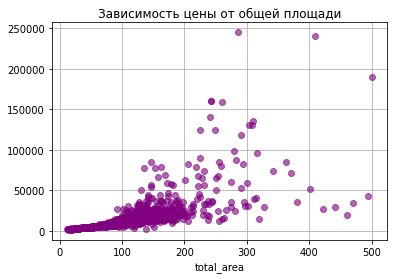

In [99]:
# применение функции для total_area
param_vs_price(data, 'total_area')
corr('total_area')

'Коэффициент корреляции Пирсона равен 0.6'

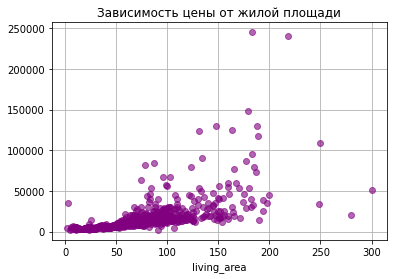

In [100]:
# применение функции для living_area
param_vs_price(data, 'living_area')
corr('living_area')

'Коэффициент корреляции Пирсона равен 0.49'

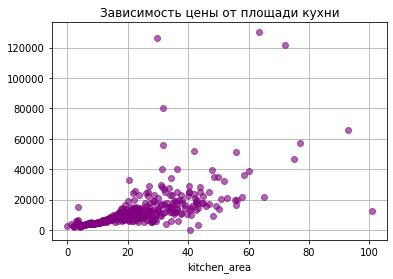

In [101]:
# применение функции для kitchen_area
param_vs_price(data, 'kitchen_area')
corr('kitchen_area')

- Коэффициент корреляции, равный 0.69, показывает среднюю связь между ***общей площадью квартиры и ее стоимостью***, поэтому судить о прямой зависимости невозможно. Но можно утверждать, что цены на квартиры, площадью до 80 кв.м. напрямую зависят от общей площади квартиры. Свыше 80 кв.м. идет большой разброс. Поэтому показательнее будет учитывать также расположение квартиры (удаленность от центра). 
- Аналогичная ситуация на графике ***зависимости стоимости квартиры от жилой площади***. Коэффициент корреляции Пирсона равен 0.6, что говорит о наличии средней зависимости, проявляющейся не на всем промежутке увеличения жилой площади.
- Зависимость ***цены квартиры от площади кухни*** слабая, о чем говорит коэффициент корреляции 0.49, а также данные на графике. Интересно, что есть квартира, кухонным метражом 30, которая сильно дороже квартиры, метраж кухни которой около 100 кв.м. 

Делаем вывод, что нужно учитывать также другие влияющие факторы. Однозначно сказать о наличии зависимостей цен от метражей квартиры, жилой площади и кухни невозможно.

**Изучим зависимость цены от количества комнат и типа этажа**

In [102]:
# создание функции для построение столбчатой диаграммы
def parameter_vs_price(df, column):
    # создание словаря для заголовков диаграмм
    title = {'rooms':'Зависимость цены от количества комнат', 'floor_type': 'Зависимость цены от типа этажа'}
    # нахождение медианной стоимости квартир
    df_group = df.groupby(column)['last_price'].median().sort_values()
    # построение диаграмм зависимости стоимости квартиры от соответсвующего параметра
    plot = df_group.plot(x=column, y="last_price", kind='bar', ec='green', 
                         title=title[column], legend=None, figsize=(9,4), color='pink')
    return plot

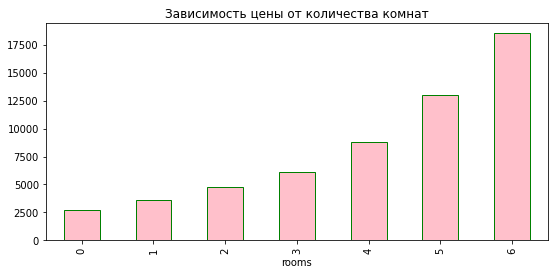

In [103]:
# применение функции для rooms
parameter_vs_price(data, 'rooms')
None

Гипотеза подтвердилась: чем больше комнат, тем выше стоимость квартиры.

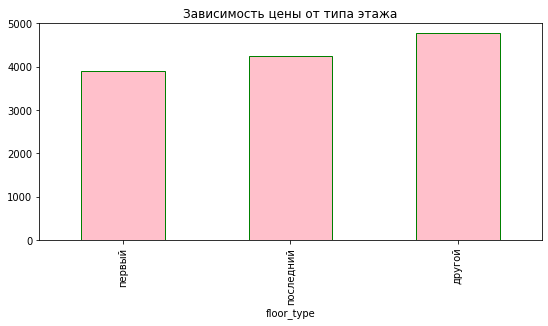

In [104]:
# применение функции для floor_type
parameter_vs_price(data, 'floor_type')
None

Цены на квартиры, расположенные на первом этаже в среднем ниже, чем на квартиры, расположенные на других этажах. Цены на квартиры, расположенные на последнем эатже выше, чем на квартиры, расположенные на первом.

**Изучим зависимость цены от дня недели, месяца и года публикации объявления**

In [105]:
# создание функции для построение графика
def time_vs_price(df, column):
    # создание словаря для названия графиков
    title = {'rooms':'Зависимость цены от количества комнат', 'floor_type': 'Зависимость цены от типа этажа',
             'weekday': 'Зависимость цены от дня недели публикации',
             'month_publication': 'Зависимость цены от месяца публикации', 
             'year_publication': 'Зависимость цены от года публикации' }
    # нахождение медианной стоимости квартир
    df_pivot = df.pivot_table(index=column, values='last_price', aggfunc='median')
    df_pivot.columns = ['median']
    # построение графиков зависимости медианной стоимости квартиры от соответсвующего параметра
    plot = df_pivot.plot(y='median', grid=True, figsize=(8, 5), color='purple', title=title[column])
    return plot

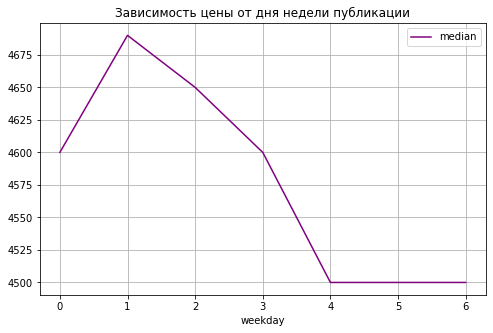

In [106]:
# применение функции для weekday
time_vs_price(data, 'weekday')
None

Различия в стоимости квартир в зависимости от дня недели публикации объявления есть, но незначительные. Но можно утверждать, что цены на квартиры, опубликованные в выходной день в среднем чуть ниже цен на квартиры, опубликованные в будний день.

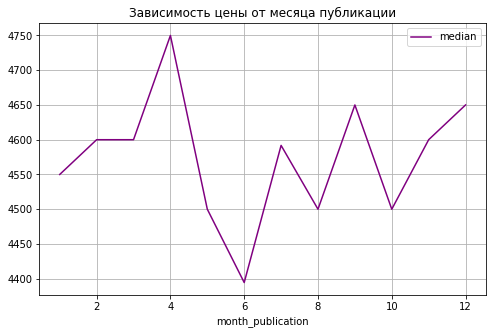

In [107]:
# применение функции для month_publication
time_vs_price(data, 'month_publication')
None

Стоимость квартир, опубликованных с февраля по апрель в среднем выше стоимости квартир, опубликованных в другие месяцы. В летний сезон цены на квартиры самые низкие, вероятно это связано с малым спросом, так как это период отпусков. Самым пиковым по стоимости квартир месяцем является апрель.

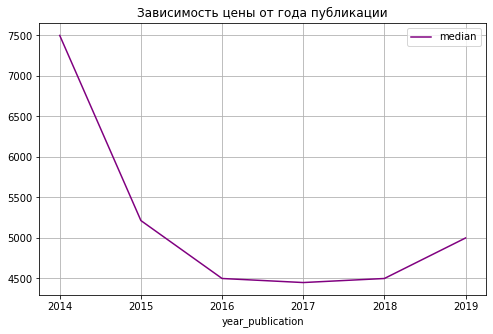

In [108]:
# применение функции для year_publication
time_vs_price(data, 'year_publication')
None

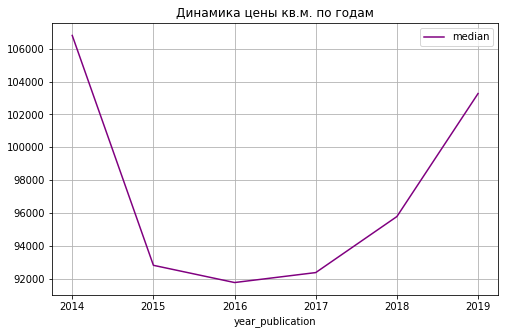

In [109]:
data_pivot = data.pivot_table(index='year_publication', values='price_one_sq_m', aggfunc='median')
data_pivot.columns = ['median']
    # построение графиков зависимости медианной стоимости квартиры от соответсвующего параметра
data_pivot.plot(y='median', grid=True, figsize=(8, 5), color='purple', title='Динамика цены кв.м. по годам')
None

Интересно, что с 2016 по 2017 год стоимость квартир снижалась, а цена за квадратный метр увеличивалась. Возможно это связано с выходом на рынок квартир с меньшей площадью.

Изучим срез данных о квартирах, выставленных на продажу в 2014 году

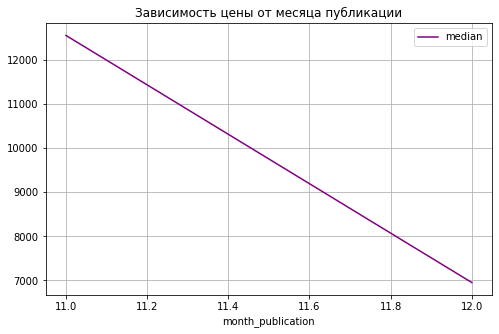

In [110]:
time_vs_price(data.query('year_publication == 2014'), 'month_publication')
None

Данные представлены только за два последних месяца года, причему стоимост квартир в декабре начала значительно снижаться. Это связано с событиями 2014 года. Тогда повысилась активность людей, желающих побыстрее купить квартиру для жизни и решить квартирный вопрос из-за страха потерять деньги на фоне беспрецедентного обвала рубля.

После 2014 года стоимость квартир постепенно начала снижаться, а к 2019 году снова расти.

**4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра**

In [111]:
# запишем в переменную top_location список населенных пунктов с количестовм опубликованных объявлений 
# и отсортируем по убыванию
top_location = data['locality_name'].value_counts().sort_values(ascending=False)

# запишем в переменную mean_price_metr список населенных пунктов с количестовм опубликованных объявлений 
# и средней по населенному пункту стоимостью за 1 кв.м.
mean_price_metr = data.pivot_table(index='locality_name', values='price_one_sq_m', aggfunc=['count', 'mean'])

# переимениуем столбцы 
mean_price_metr.columns = ['count', 'mean']

# запишем в переменную  mean_price_metr_sorted таблицу со средней по населенному пункту стоимостью 1 кв.м.
# и отсортируем таблицу по убыванию количества объявлений 
mean_price_metr_sorted = mean_price_metr.sort_values('count', ascending=False)[:10]

# создадим новую таблицу топ-10 населенных пунктов по количеству опубликованных объявлений и средней стоимость 1 кв.м. 
df_top = {
            'Населенный пункт': top_location[:10].index.tolist(),
            'Cредняя стоимость 1 кв.м., руб.': mean_price_metr_sorted['mean'].values.round(1)
         }
data_top =pd.DataFrame(df_top)
data_top.sort_values('Cредняя стоимость 1 кв.м., руб.', ascending=False)

,Населенный пункт,"Cредняя стоимость 1 кв.м., руб."
0,санкт-петербург,113535.1
5,пушкин,102106.2
2,кудрово,95331.6
7,парголово,90363.3
1,мурино,86139.2
3,шушары,78729.0
6,колпино,75191.4
8,гатчина,68695.3
4,всеволожск,68665.8
9,выборг,58513.6


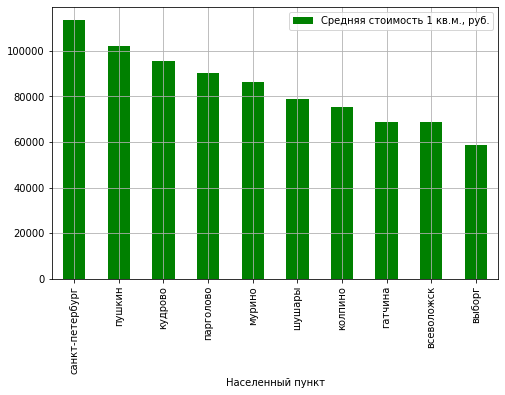

In [113]:
data_top.sort_values('Cредняя стоимость 1 кв.м., руб.', ascending=False).plot(x='Населенный пункт', 
                                                                              y='Cредняя стоимость 1 кв.м., руб.', 
                                                                              kind='bar', grid=True, figsize=(8, 5),
                                                                              color='green')
None

Средняя стоимость одного квадратного метра самая высокая в Санкт-Петербурге, что было ожидаемо. В Выборге - самая низкая (почти в 2 раза меньше, чем в Санкт-Петербурге).

**4.5. Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра**

In [114]:
data_spb = data.query('locality_name == "санкт-петербург"')
data_spb = data_spb[['locality_name', 'city_centers_nearest_km', 'last_price']]
data_spb = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price').sort_values('last_price', ascending=False).round(1)
data_spb.head()

,last_price
city_centers_nearest_km,
0.6,38146.8
0.3,35954.7
0.4,35157.1
2.2,29505.5
1.3,23804.1


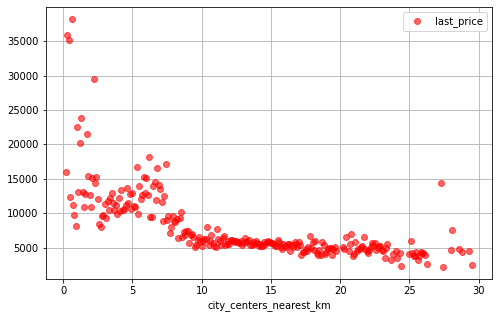

In [115]:
data_spb.plot(y='last_price', style='o', grid=True, figsize=(8, 5), alpha=0.6, color='red' )
None

В пределах 10 км от центра города не наблюдается зависимости стоимости квартир от расстояния до центра. Также стоит учитывать и другие факторы, влияющие на стоимость жилья (площадь квартиры, год постройки дома, этажность, удаленность от парков и тд). Но можно сделать вывод, что стоимость жилья в пределах 10 км от центра в среднем выше стоимости жилья, расположенного за пределами данного радиуса. Стомость на квартиры, расположенные за пределами 10 км от центра по мере их удаленности начинает снижаться. Но так же есть выбивающиеся значения - квартиры, на стоимосость которых вероятно влияют вышеописанные факторы.

### Общий вывод

В данной работе проводилось исследование данных архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

**В результате предобработки данных:**
* были удалены строки с незаполненными данными в столбцах **floors_total** и **locality_name**
* обработаны пропущенные значения:
    1. в столбце **balcony** пропуски заменены 0
    2. в столбце **is_apartment** пропуски заменены на апартаменты в тех строках, где количество комнат равно 0, и квартира не является студией
    3. в столбце **kitchen_area** пропуски заменены на 0 в квартирах- студиях.
    4. пропуски в столбце **ceiling_height** заменили медианным значением по населенному пункту
* обработаны аномальные значения (удалены строки с количеством комнат больше 7, количеством балконов больше 3, высотой потолков больше 4 м и квартиры, общей площадью более 150 кв.м., где жилая площадь вполовину меньше общей)
* устранены неявные дубликаты во избежание повтора названий населенных пунктов, которые могли повлиять на результаты исследования при расчетах средних значений по населенному пункту. 

**В таблицу были добавлены новые столбцы с данными для дальнейшего анализа:** 

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).  

**В ходе исследовательского анализа данных, были выявлены и изучены следующие особенности, существующие на рынке недвижимости Санк- Петербурга и ленинградской области:** 


- Площадь квартир в объявлениях о продаже колеблется от 12 до 500 кв.м, при срдней площади в 58 кв.м. 
- Средняя стоимость квартир в данной выборке состовляет 6 млн 100 тысяч рублей.
- Среднее время продажи квартиры – 180 дней. Стоит учитывать, что многие объявления закрываются автоматически по истечении 45 и 60 дней.
- Больше всего квартир продается в домах этажность 5 и 10.
- Изучая зависимость стоимости жилья от общей площади, было выявлено, что цены на квартиры, площадью до 80 кв.м. напрямую зависят от общей площади квартиры, в то время, как площадь кухни имеет слабую связь со стоимостью жилья.  
Также выявлено, что с увеличением числа комнат, увеличивается и средняя стоимость квартиры. 
Стоимость квартир, опубликованных в выходной день в среднем на 2% ниже стоимости квартир, опубликованных в будний.  
Но если выбирать сезон для покупки дешевой квартиры, то лучше всего подойдут летние месяцы (июнь и август) и октябрь со средней стоимостью квартир 4400 тыс.руб. и 4500 тыс.руб. в данной выборке соответсвенно (но стоит учесть, что и количество предложений в летний сезон меньше). Пиковым по стоимости квартир месяцем является апрель со средней стоимостью квартир 4750 тыс.руб. 
Также на стоимость квартир влияет этаж, на котором она расположена. В среднем квартиры на 1 этаже дешевле. 
- В ноябре 2014 года наблюдалось резкое увеличение цен на квартиры, постепенно снижающееся до 2017 года. С 2017 года идет постепенное увеличение цен на недвижимость.
- В Санкт- Петербурге самая высокая средняя стоимость за 1 кв.м. В пределах 10 км от центра города не наблюдается зависимости стоимости квартир от расстояния до центра. Стомость на квартиры, расположенные за пределами 10 км от центра по мере их удаленности начинает снижаться.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [ ]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод